<a href="https://colab.research.google.com/github/MJ-best/macro_finance/blob/main/minjun_macro_finance_20220103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 매크로 분석을 위한 파이썬
- 2022년 12월 11일 시작
- <브라질에서 비가 내리면 스타벅스 주식을 사라>, <원칙>을 읽고 감명받아서 시작했다
- 마켓타이밍을 잡을 수는 없지만 거래를 해야할 지 말아야 할지, 호황인지 불황인지 업종의 순환은 어떤지를 살펴보려고 한다
- 한투 API와 연동하여 주식거래 자동화

In [13]:
import datetime
from pytz import timezone

print("last update : ",datetime.datetime.now(timezone('Asia/Seoul')))

last update :  2023-01-03 19:18:09.884096+09:00


### FinanceDataReader 
- 주식가격정보 및 각종 선행지표를 불러올 수 있는 라이브러리
- https://github.com/financedata-org/FinanceDataReader

In [14]:
pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
#한국 거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,55400,2,-100,-0.18,55400,56000,54500,13547030,747898872200,330725953270000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,440500,2,-5500,-1.23,446000,449500,435000,218710,96276867000,103077000000000,234000000,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,803000,2,-24000,-2.90,825000,827000,799000,71420,57671339000,57152722000000,71174000,STK
3,000660,KR7000660001,SK하이닉스,KOSPI,,75600,2,-100,-0.13,75600,76300,73100,2719437,203401949925,55036978794000,728002365,STK
4,051910,KR7051910008,LG화학,KOSPI,,601000,2,-3000,-0.50,605000,610000,599000,112173,67595985000,42425998143000,70592343,STK


In [17]:
# S&P 500 상장종목 전체
df_SnP500 = fdr.StockListing('S&P500')
df_SnP500.head()

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


In [18]:
# 삼성전자의 주식의 가격 불러오기
df_samsung = fdr.DataReader('005930','2022')
df_samsung.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-12-20,59000,59100,58500,58600,9284761,-0.015126
2022-12-21,58700,59100,58000,58000,10356971,-0.010239
2022-12-22,58100,59100,58100,59100,10720630,0.018966
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454
2022-12-28,57600,57600,56400,56600,14665410,-0.025818
2022-12-29,56000,56200,55300,55300,11295935,-0.022968
2023-01-02,55500,56100,55200,55500,10031448,0.003617


In [19]:
df = fdr.DataReader('FRED:NASDAQCOM', data_source='fred')
df

,NASDAQCOM
DATE,
1980-01-02,148.17
1980-01-03,145.97
1980-01-04,148.02
1980-01-07,148.62
1980-01-08,150.68
...,...
2022-12-23,10497.86
2022-12-26,10497.86
2022-12-27,10353.23


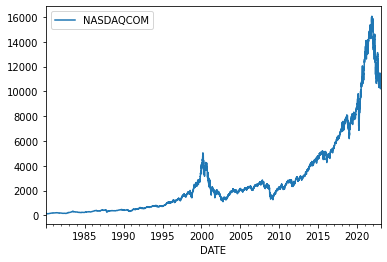

In [20]:
df.plot()

In [21]:
# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df = fdr.DataReader('FRED:NASDAQCOM,ICSA', start='2019', data_source='fred')
df

,NASDAQCOM,ICSA
DATE,,
2019-01-02,6665.938,NaN
2019-01-03,6463.504,NaN
2019-01-04,6738.855,NaN
2019-01-05,6738.855,222000.0
2019-01-07,6823.469,222000.0
...,...,...
2022-12-24,10497.860,225000.0
2022-12-26,10497.860,225000.0
2022-12-27,10353.230,225000.0


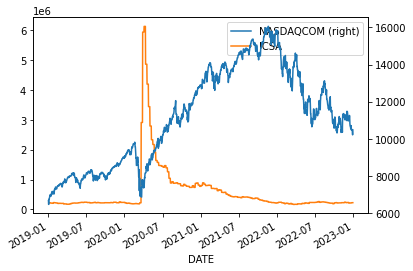

In [22]:
ax = df.plot(secondary_y='NASDAQCOM')

## 일간 변동률로 주가 비교하기

In [45]:
# 일간 변동로 주가비교하기
# 삼성전자는 2018년 5월 4일 액면분할을 했으므로 가격은 이때를 기준으로 계산한다
samsung = fdr.DataReader('005930','2018-05-04')
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814
...,...,...,...,...,...,...
2022-12-27,58000,58400,57900,58100,10667027,0.003454
2022-12-28,57600,57600,56400,56600,14665410,-0.025818
2022-12-29,56000,56200,55300,55300,11295935,-0.022968


In [32]:
samsung_day_price_change = (samsung['Close'] / samsung['Close'].shift(1) - 1  )*100

In [33]:
samsung_day_price_change

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
                ...   
2022-12-27    0.345423
2022-12-28   -2.581756
2022-12-29   -2.296820
2023-01-02    0.361664
2023-01-03   -0.180180
Name: Close, Length: 1150, dtype: float64

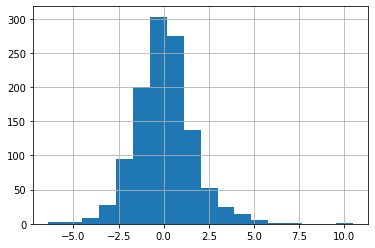

In [39]:
#이미 테이블에서 구현이 되어있음, 주가 변동율을 히스토그램으로 그려보자
samsung_change = samsung['Change']*100
plt.hist(samsung_change, bins=18)
plt.grid(True)

In [41]:
samsung_change.describe()

count    1150.000000
mean        0.016797
std         1.613741
min        -6.387665
25%        -0.993260
50%         0.000000
75%         0.857757
max        10.470588
Name: Change, dtype: float64

## 일간 변동률 누적합 구하기

In [42]:
samsung_change_sum = samsung_change.cumsum()

In [43]:
samsung_change_sum

Date
2018-05-04    -2.075472
2018-05-08    -0.726724
2018-05-09    -3.958663
2018-05-10    -2.583418
2018-05-11    -3.164813
                ...    
2022-12-27    24.014116
2022-12-28    21.432361
2022-12-29    19.135541
2023-01-02    19.497205
2023-01-03    19.317025
Name: Change, Length: 1150, dtype: float64

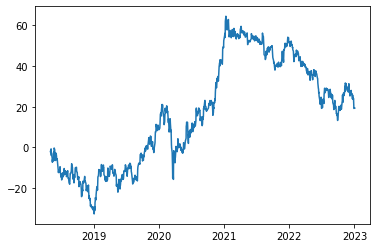

In [44]:
plt.plot(samsung_change_sum)